In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Define path to data folder
base_path = "../data/raw"

# Load datasets
sales = pd.read_csv(os.path.join(base_path, "train.csv"))
stores = pd.read_csv(os.path.join(base_path, "stores.csv"))
features = pd.read_csv(os.path.join(base_path, "features.csv"))

# Merge into a single df
df = sales.merge(stores, on="Store").merge(features, on=["Store", "Date"])

# Convert Date
df["Date"] = pd.to_datetime(df["Date"])

# Quick check
print(df['Dept'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


## Basic Checks & Cleaning

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check data types and shapes
print(df.info())

# Are there duplicate rows?
print(df.duplicated().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 

In [25]:
df.to_csv("../data/clean/merged_sales_data.csv", index=False)

## Exploring Columns of Interest

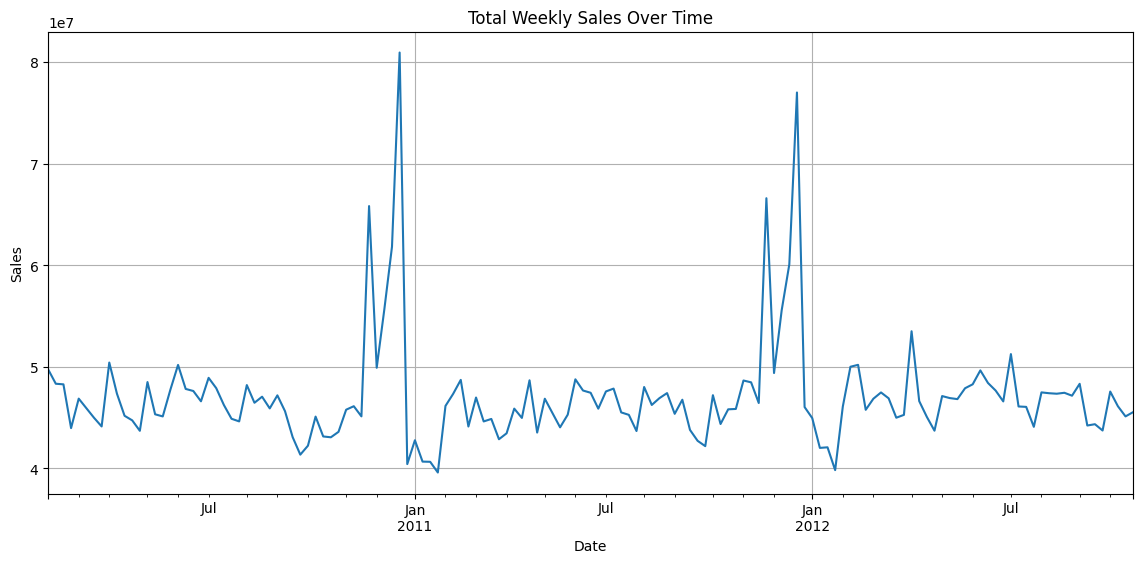

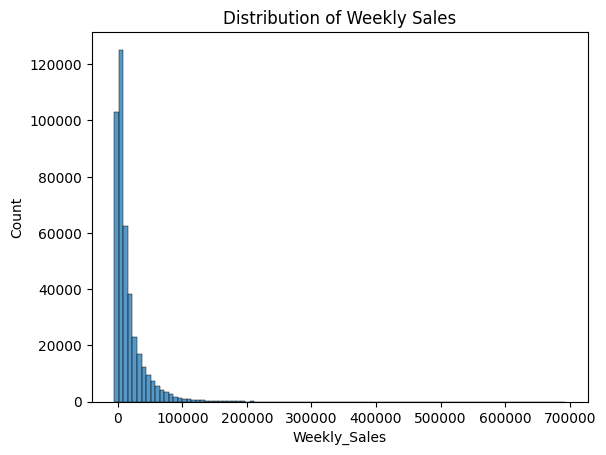

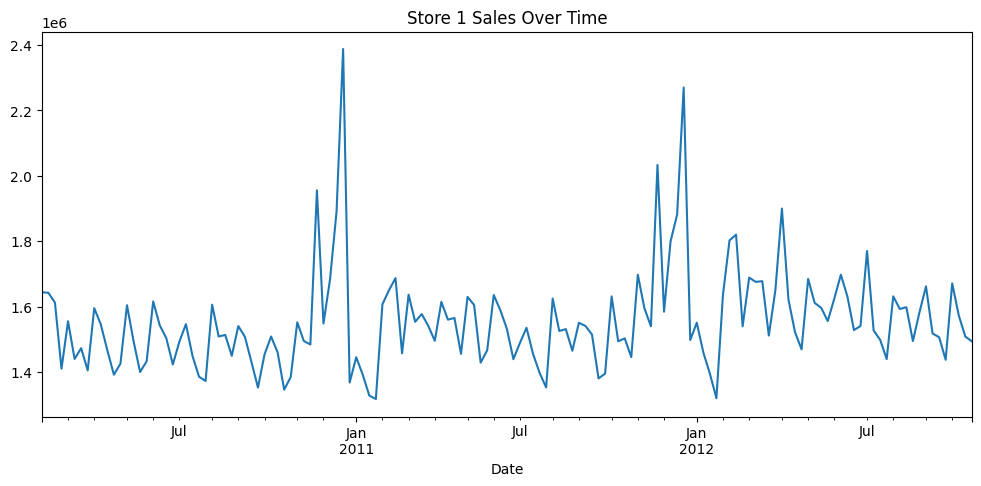

In [4]:
# Overall sales trend
df.groupby("Date")["Weekly_Sales"].sum().plot(figsize=(14,6), title="Total Weekly Sales Over Time")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Distribution of sales
sns.histplot(df["Weekly_Sales"], bins=100)
plt.title("Distribution of Weekly Sales")
plt.show()

# Sales trend for a single store
store_sample = df[df["Store"] == 1]
store_sample.groupby("Date")["Weekly_Sales"].sum().plot(figsize=(12,5), title="Store 1 Sales Over Time")
plt.show()

## Feature Engineering Preperation

In [6]:
# Add calendar features
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Year"] = df["Date"].dt.year

# Convert IsHoliday to int
df["IsHoliday"] = df["IsHoliday_y"].astype(int)

## Modeling Target

In [7]:
# Focus on Store 1, Dept 1
df_small = df[(df["Store"] == 1) & (df["Dept"] == 1)].sort_values("Date")

## Visualizing Seasonality

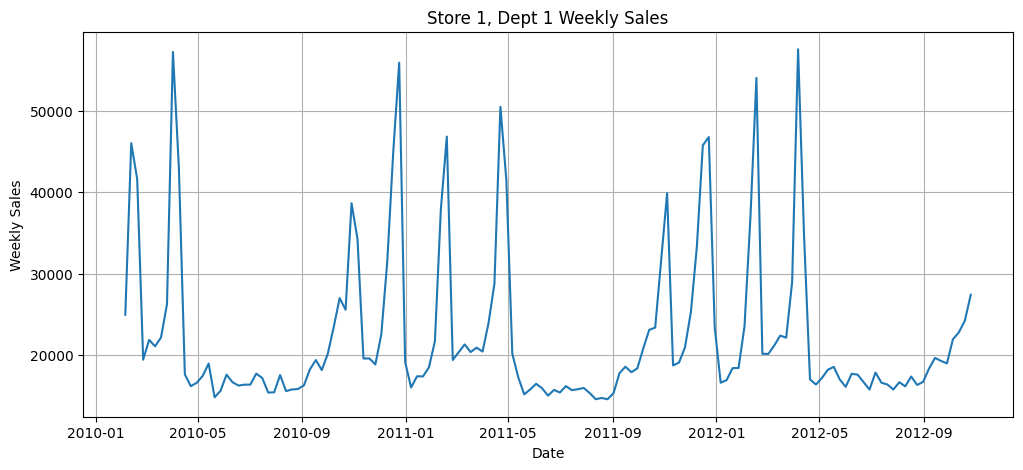

In [8]:
# Weekly sales over time
plt.figure(figsize=(12,5))
plt.plot(df_small["Date"], df_small["Weekly_Sales"])
plt.title("Store 1, Dept 1 Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

In [9]:
# Add the source_code folder to the system path
sys.path.append(os.path.abspath("../source_code"))

# Import the forecasting function
from forecasting_models import forecast_and_plot_prophet

Importing plotly failed. Interactive plots will not work.
